# Master Equation Solver: Vacuum Rabi oscillations
see https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/time-evolution/004_rabi-oscillations.ipynb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mesolve, qeye, sigmaz, tensor

## Setup the operators, the Hamiltonian and initial state
Here we define the initial state and operators for the combined system, which consists of the cavity and the atom. We make use of the tensor product, where the first part refers to the cavity and the second part to the atom. We define the atom to be in the excited state and the cavity in its ground state.

The initial state consists of the cavity ground state and the atom in the excited state. We define the collapse operator for the cavity/atom in the combined system and the Hamiltonian with and without the rotating-wave-approach.

In [4]:
N = 15  # number of cavity fock states
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005  # cavity dissipation rate
gamma = 0.05  # atom dissipation rate
n_th_a = 0.0  # temperature in frequency units
use_rwa = True

tlist = np.linspace(0, 40, 100)

# intial state
psi0 = tensor(basis(N, 0), basis(2, 0))

# collapse operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2).dag())
sz = tensor(qeye(N), sigmaz())

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() + a) * (sm + sm.dag())

## Create a list of collapse operators that describe the dissipation

We create a list of collapse operators c_ops, which is later passed on to qutip.mesolve. For each of the three processes one collapse operator is defined.

In [5]:
c_op_list = []

# Photon annihilation
rate = kappa * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * a)

# Photon creation
rate = kappa * n_th_a
c_op_list.append(np.sqrt(rate) * a.dag())

# Atom annihilation
rate = gamma
c_op_list.append(np.sqrt(rate) * sm)

Here we evolve the system with the Lindblad master equation solver qutip.mesolve, and we request that the expectation values of the operators a†a
 and σ+σ−
 are returned by the solver by passing the list [a.dag()*a, sm.dag()*sm] as the fifth argument to the solver.

In [7]:
output = mesolve(H, psi0, tlist, c_op_list, [
    a.dag() * a, sm.dag() * sm])

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the mesolve above). We can clearly see how energy is being coherently transferred back and forth between the cavity and the atom.

Text(0.5, 1.0, 'Vacuum Rabi oscillations at T=0.0')

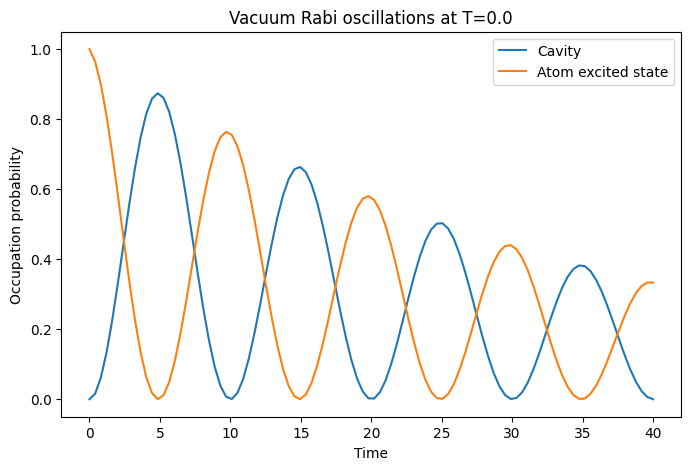

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations at T={}".format(n_th_a))